In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.stats import shapiro
from scipy.stats import kstest
from matplotlib.cbook import boxplot_stats

In [3]:
data = pd.read_csv("dataset/pokemon.csv")
data

,Id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [5]:
data.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [7]:
df = pd.concat([data["Legendary"].value_counts(), 
                data["Legendary"].value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))
print("Legendary")
print (df)
df = pd.concat([data["Generation"].value_counts(), 
                data["Generation"].value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))
print("Generations")
print (df)

Legendary
       counts  percentage
False     735      91.875
True       65       8.125
Generations
   counts  percentage
1     166      20.750
5     165      20.625
3     160      20.000
4     121      15.125
2     106      13.250
6      82      10.250


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D13D592D90>,
      dtype=object)

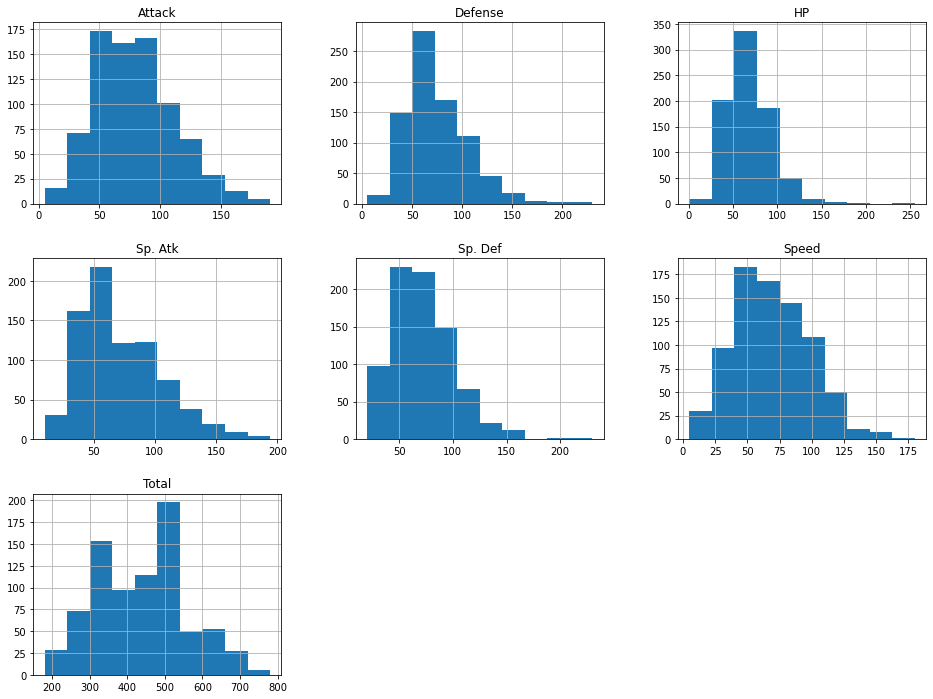

In [22]:
data.hist(column = ["Total","HP", "Attack", "Defense","Sp. Atk","Sp. Def","Speed"],bins = 10,  figsize = [16,12])

#### Dla 10 kubełków
#### Total:
#### Rozkład ma 3 mody
#### Attack, Sp. Atk:
#### Rozkład dwumodalny
#### HP, Attack, Defense, Sp. Def, Speed:
#### Rozkład jednomodalny

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1405EBB80>,
      dtype=object)

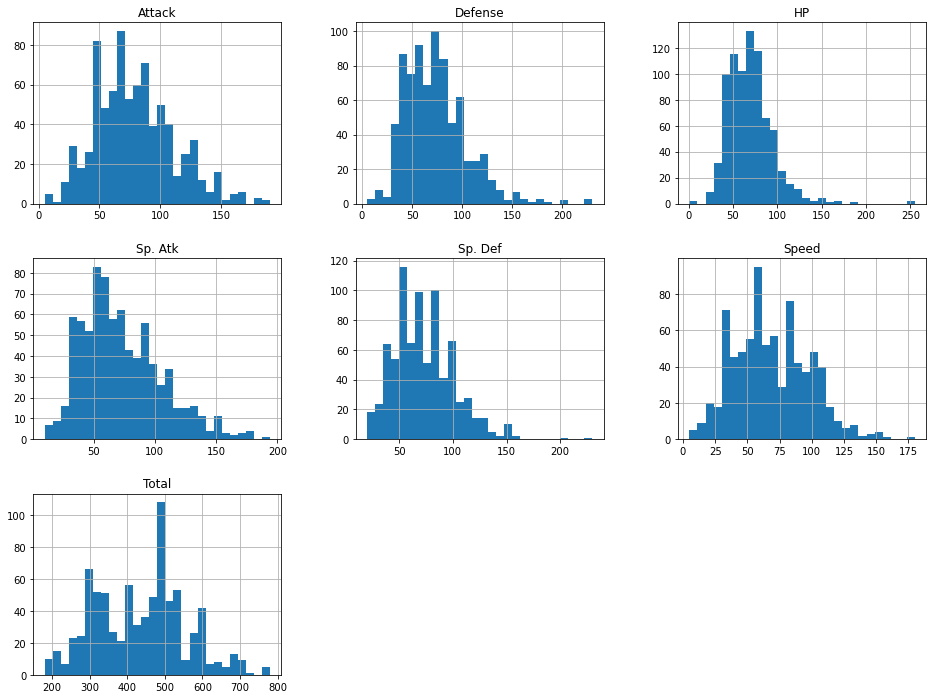

In [28]:
data.hist(column = ["Total","HP", "Attack", "Defense","Sp. Atk","Sp. Def","Speed"],bins = int(math.sqrt(len(data))),  figsize = [16,12])

### Dla liczby kubełków równej pierwiastkowi rekordów (28) wszystkie histogramy są wielomodalne

In [51]:
for col in ["Total","HP", "Attack", "Defense","Sp. Atk","Sp. Def","Speed"]:
    print(col + ' p-value: %.15f' % shapiro(data[col]).pvalue)

Total p-value: 0.000000019324137
HP p-value: 0.000000000000000
Attack p-value: 0.000000002468465
Defense p-value: 0.000000000000000
Sp. Atk p-value: 0.000000000000047
Sp. Def p-value: 0.000000000000083
Speed p-value: 0.000000130934666


#### Test shapiro-wilka: 
#### H0: Dane mają rozkład normalny
#### H1: Dane nie mają rozkładu normalnego

#### Wszystkie powyższe kolumny posiadają p-value < 0.05 zatem odrzucamy H0 więc dane nie mają rozkładu normalnego

Total : [{'mean': 69.25875, 'iqr': 30.0, 'cilo': 63.33476353030568, 'cihi': 66.66523646969432, 'whishi': 125, 'whislo': 10, 'fliers': array([  1, 140, 250, 130, 130, 160, 190, 255, 150, 144, 130, 170, 150,
       135, 150, 150, 165, 126, 126], dtype=int64), 'q1': 50.0, 'med': 65.0, 'q3': 80.0}]

HP : [{'mean': 69.25875, 'iqr': 30.0, 'cilo': 63.33476353030568, 'cihi': 66.66523646969432, 'whishi': 125, 'whislo': 10, 'fliers': array([  1, 140, 250, 130, 130, 160, 190, 255, 150, 144, 130, 170, 150,
       135, 150, 150, 165, 126, 126], dtype=int64), 'q1': 50.0, 'med': 65.0, 'q3': 80.0}]

Attack : [{'mean': 69.25875, 'iqr': 30.0, 'cilo': 63.33476353030568, 'cihi': 66.66523646969432, 'whishi': 125, 'whislo': 10, 'fliers': array([  1, 140, 250, 130, 130, 160, 190, 255, 150, 144, 130, 170, 150,
       135, 150, 150, 165, 126, 126], dtype=int64), 'q1': 50.0, 'med': 65.0, 'q3': 80.0}]

Defense : [{'mean': 69.25875, 'iqr': 30.0, 'cilo': 63.33476353030568, 'cihi': 66.66523646969432, 'whishi': 125,

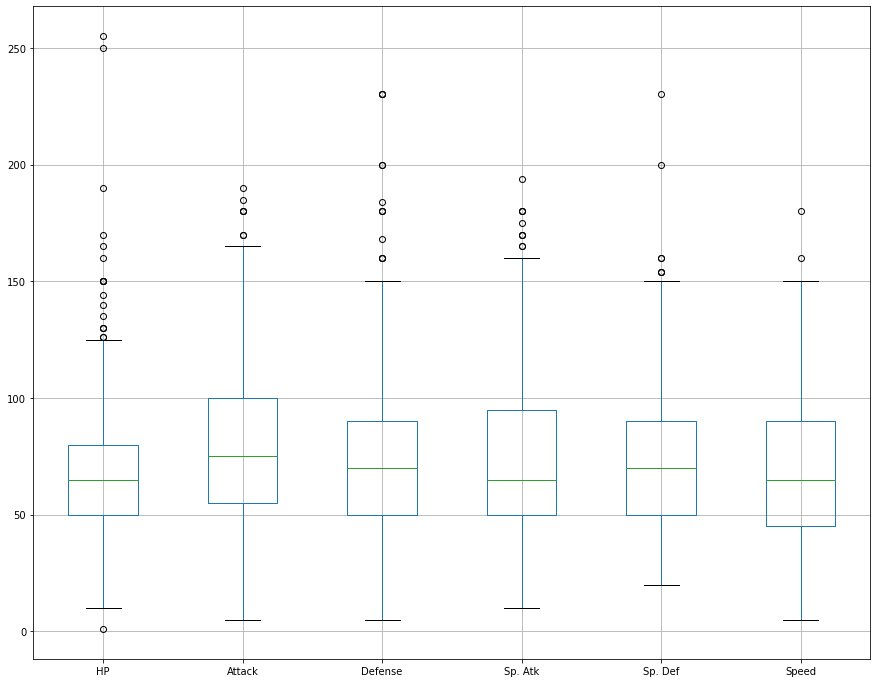

In [112]:
data.boxplot(column = ["HP", "Attack", "Defense","Sp. Atk","Sp. Def","Speed"], figsize = [15,12])

In [114]:
for col in ["Total","HP", "Attack", "Defense","Sp. Atk","Sp. Def","Speed"]:
    print(f'{col} : {boxplot_stats(data[col])}\n')

Total : [{'mean': 435.1025, 'iqr': 185.0, 'cilo': 439.7310417702184, 'cihi': 460.2689582297816, 'whishi': 780, 'whislo': 180, 'fliers': array([], dtype=int64), 'q1': 330.0, 'med': 450.0, 'q3': 515.0}]

HP : [{'mean': 69.25875, 'iqr': 30.0, 'cilo': 63.33476353030568, 'cihi': 66.66523646969432, 'whishi': 125, 'whislo': 10, 'fliers': array([  1, 140, 250, 130, 130, 160, 190, 255, 150, 144, 130, 170, 150,
       135, 150, 150, 165, 126, 126], dtype=int64), 'q1': 50.0, 'med': 65.0, 'q3': 80.0}]

Attack : [{'mean': 79.00125, 'iqr': 45.0, 'cilo': 72.50214529545852, 'cihi': 77.49785470454148, 'whishi': 165, 'whislo': 5, 'fliers': array([190, 185, 180, 180, 180, 170, 170], dtype=int64), 'q1': 55.0, 'med': 75.0, 'q3': 100.0}]

Defense : [{'mean': 73.8425, 'iqr': 40.0, 'cilo': 67.77968470707424, 'cihi': 72.22031529292576, 'whishi': 150, 'whislo': 5, 'fliers': array([180, 180, 160, 200, 230, 230, 180, 230, 200, 160, 160, 168, 184],
      dtype=int64), 'q1': 50.0, 'med': 70.0, 'q3': 90.0}]

Sp. Atk

### HP:
#### Q1: 50.0 | Mediana: 65.0 | Q3: 80.0
#### 13 obserwacji odstających, jedna poniżej minimum, 12 ponad maksimum
#### 50% obserwacji znajduje się między 50, a 80
#### Dolny wąs znajduje się na poziomie 10, górny: 125

### Attack:
#### Q1: 55.0 | Mediana: 75.0 | Q3: 100.0
#### 4 obserwacje odstające, wszystkie ponad maksimum
#### 50% obserwacji znajduje się między 55, a 100
#### Dolny wąs znajduje się na poziomie 5, górny: 165

### Defense:
#### Q1: 50.0 | Mediana: 70.0 | Q3: 90.0
#### 6 obserwacji odstających, wszystkie ponad maksimum
#### 50% obserwacji znajduje się między 50, a 90
#### Dolny wąs znajduje się na poziomie 5, górny: 150

### Sp. Atk:
#### Q1: 49.75 | Mediana: 65.0 | Q3: 95.0
#### 5 obserwacji odstających,wszystkie  ponad maksimum
#### 50% obserwacji znajduje się między 49.75, a 95
#### Dolny wąs znajduje się na poziomie 10, górny: 160

### Sp. Def:
#### Q1: 50.0 | Mediana: 70.0 | Q3: 90.0
#### 4 obserwacje odstające, wszystkie ponad maksimum
#### 50% obserwacji znajduje się między 50, a 90
#### Dolny wąs znajduje się na poziomie 20, górny: 150

### Speed:
#### Q1: 45.0 | Mediana: 65.0 | Q3: 90.0
#### 2 obserwacje odstające, obie ponad maksimum
#### 50% obserwacji znajduje się między 45, a 90
#### Dolny wąs znajduje się na poziomie 5, górny: 150

### Total:
#### Q1: 330.0 | Mediana: 450.0 | Q3: 515.0
#### Brak obserwacji odstających
#### 50% obserwacji znajduje się między 330, a 515
#### Dolny wąs znajduje się na poziomie 180, górny: 780

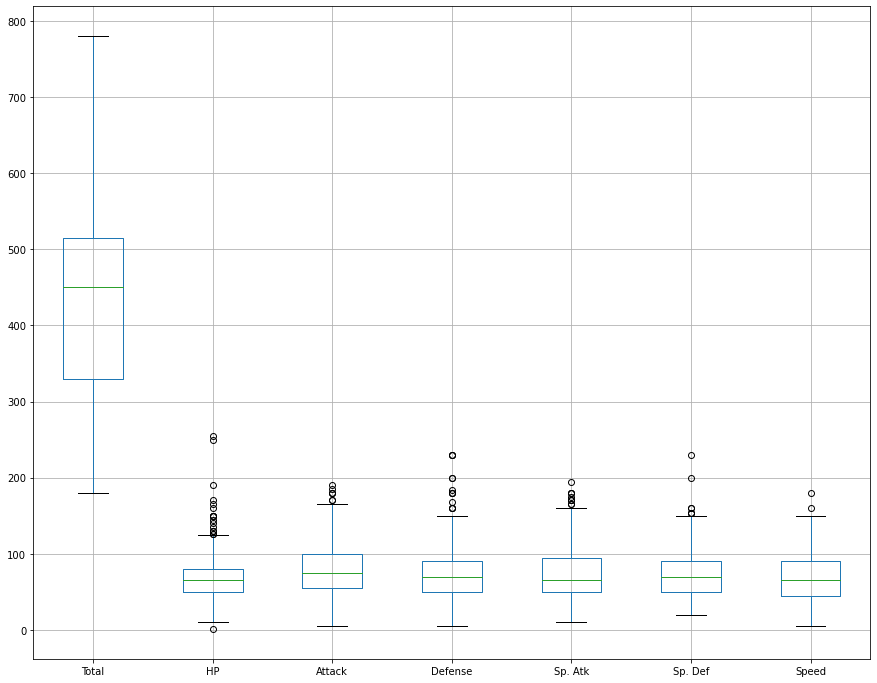

In [91]:
data.boxplot(column = ["Total","HP", "Attack", "Defense","Sp. Atk","Sp. Def","Speed"], figsize = [15,12])

In [216]:
df = data.groupby(["HP", "Attack", "Defense","Sp. Atk","Sp. Def","Speed"]) \
.filter(lambda g: len(g) > 1)

df["groupid"] = data.groupby(["HP", "Attack", "Defense","Sp. Atk","Sp. Def","Speed"]) \
.filter(lambda g: len(g) > 1) \
.groupby(["HP", "Attack", "Defense","Sp. Atk","Sp. Def","Speed"]) \
.ngroup()

groups_with_leg_and_non_leg = list()
for g_id in df["groupid"].unique():
    true_counter = 0
    false_counter = 0
    for index, row in df.loc[df["groupid"] == g_id].iterrows():
        if row["Legendary"] == True:
            true_counter = true_counter + 1
        else:
            false_counter = false_counter + 1
    if true_counter > 0 and false_counter > 0:
        groups_with_leg_and_non_leg.append(df[df["groupid"] == g_id])
        
groups_with_leg_and_non_leg[0]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,groupid
165,151,Mew,Psychic,NaN,600,100,100,100,100,100,100,1,False,11
271,251,Celebi,Psychic,Grass,600,100,100,100,100,100,100,2,False,11
427,385,Jirachi,Steel,Psychic,600,100,100,100,100,100,100,3,True,11
548,490,Manaphy,Water,NaN,600,100,100,100,100,100,100,4,False,11
550,492,ShayminLand Forme,Grass,NaN,600,100,100,100,100,100,100,4,True,11
553,494,Victini,Psychic,Fire,600,100,100,100,100,100,100,5,True,11


### Tak, są przypadki gdzie atrybuty są identyczne, a wartość zmiennej decyzyjnej jest różna
#### Rozważano atrybuty HP, Attack, Defense, Sp. Atk, Sp. Def, Speed, zmienna decyzyjna: Legendary
#### Znaleziono 6 przypadków pokemonów z takimi samymi atrybutami, z czego 3 są pokemonami legendarnymi, a 3 nie

In [219]:
df = data.groupby(["HP", "Attack", "Defense","Sp. Atk","Sp. Def","Speed", "Generation"]) \
.filter(lambda g: len(g) > 1)

df["groupid"] = data.groupby(["HP", "Attack", "Defense","Sp. Atk","Sp. Def","Speed","Generation"]) \
.filter(lambda g: len(g) > 1) \
.groupby(["HP", "Attack", "Defense","Sp. Atk","Sp. Def","Speed","Generation"]) \
.ngroup()

groups_with_leg_and_non_leg = list()
for g_id in df["groupid"].unique():
    true_counter = 0
    false_counter = 0
    for index, row in df.loc[df["groupid"] == g_id].iterrows():
        if row["Legendary"] == True:
            true_counter = true_counter + 1
        else:
            false_counter = false_counter + 1
    if true_counter > 0 and false_counter > 0:
        groups_with_leg_and_non_leg.append(df[df["groupid"] == g_id])
        
groups_with_leg_and_non_leg[0]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,groupid
548,490,Manaphy,Water,NaN,600,100,100,100,100,100,100,4,False,7
550,492,ShayminLand Forme,Grass,NaN,600,100,100,100,100,100,100,4,True,7


In [21]:
data.groupby(["Generation"])["Total"].describe()

,count,mean,std,min,25%,50%,75%,max
Generation,,,,,,,,
1,166.0,426.813253,115.878076,195.0,325.0,436.5,500.00,780.0
2,106.0,418.283019,120.114133,180.0,330.0,422.5,500.00,700.0
3,160.0,436.225000,136.314193,190.0,310.0,435.0,530.00,780.0
4,121.0,459.016529,119.556541,194.0,350.0,485.0,530.00,720.0
5,165.0,434.987879,108.117934,255.0,328.0,465.0,505.00,700.0
6,82.0,436.378049,114.952340,200.0,335.0,464.0,512.25,700.0


In [20]:
data.groupby(["Generation"])["HP"].describe()

,count,mean,std,min,25%,50%,75%,max
Generation,,,,,,,,
1,166.0,65.819277,28.153968,10.0,46.50,62.0,80.00,250.0
2,106.0,71.207547,30.589359,20.0,51.25,70.0,88.75,255.0
3,160.0,66.543750,24.059634,1.0,50.00,65.0,80.00,170.0
4,121.0,73.082645,25.113604,20.0,55.00,70.0,85.00,150.0
5,165.0,71.787879,22.407748,30.0,55.00,70.0,85.00,165.0
6,82.0,68.268293,20.907822,38.0,53.25,65.0,80.00,126.0


In [14]:
data.groupby(["Generation"])["Attack"].describe()

,count,mean,std,min,25%,50%,75%,max
Generation,,,,,,,,
1,166.0,76.638554,30.744727,5.0,55.00,75.0,95.00,190.0
2,106.0,72.028302,32.708658,10.0,50.00,73.5,90.00,185.0
3,160.0,81.625000,36.593767,15.0,54.00,75.0,100.00,180.0
4,121.0,82.867769,32.780569,5.0,62.00,80.0,103.00,170.0
5,165.0,82.066667,30.365685,25.0,55.00,80.0,103.00,170.0
6,82.0,75.804878,29.179495,22.0,53.25,69.5,94.25,160.0


In [15]:
data.groupby(["Generation"])["Defense"].describe()

,count,mean,std,min,25%,50%,75%,max
Generation,,,,,,,,
1,166.0,70.861446,28.641336,5.0,50.00,66.0,85.0,180.0
2,106.0,73.386792,39.233749,10.0,45.75,70.0,90.0,230.0
3,160.0,74.100000,35.222599,20.0,50.00,67.5,90.0,230.0
4,121.0,78.132231,30.145741,5.0,51.00,72.0,105.0,168.0
5,165.0,72.327273,23.318883,30.0,55.00,70.0,90.0,145.0
6,82.0,76.682927,31.370301,33.0,55.50,70.0,89.5,184.0


In [16]:
data.groupby(["Generation"])["Sp. Atk"].describe()

,count,mean,std,min,25%,50%,75%,max
Generation,,,,,,,,
1,166.0,71.819277,34.439106,15.0,45.0,65.0,95.00,194.0
2,106.0,65.943396,27.814977,10.0,40.0,65.0,84.50,165.0
3,160.0,75.806250,35.407510,10.0,50.0,70.0,95.00,180.0
4,121.0,76.404959,31.907047,10.0,54.0,71.0,100.00,150.0
5,165.0,71.987879,31.889097,15.0,45.0,65.0,95.00,170.0
6,82.0,74.292683,31.790785,27.0,50.0,65.0,95.25,170.0


In [17]:
data.groupby(["Generation"])["Sp. Def"].describe()

,count,mean,std,min,25%,50%,75%,max
Generation,,,,,,,,
1,166.0,69.090361,25.505275,20.0,50.0,70.0,85.0,130.0
2,106.0,73.905660,31.534268,20.0,55.0,65.0,95.0,230.0
3,160.0,71.225000,31.039628,20.0,50.0,65.0,87.0,200.0
4,121.0,77.190083,27.498883,30.0,55.0,75.0,100.0,150.0
5,165.0,68.739394,22.388721,25.0,50.0,65.0,85.0,135.0
6,82.0,74.890244,30.086298,25.0,55.0,70.5,89.0,154.0


In [18]:
data.groupby(["Generation"])["Speed"].describe()

,count,mean,std,min,25%,50%,75%,max
Generation,,,,,,,,
1,166.0,72.584337,29.675857,15.0,50.00,70.0,92.25,150.0
2,106.0,61.811321,27.263132,5.0,40.00,60.5,85.00,130.0
3,160.0,66.925000,31.331972,10.0,47.25,65.0,86.25,180.0
4,121.0,71.338843,28.475005,5.0,46.00,77.0,91.00,135.0
5,165.0,68.078788,28.726632,10.0,45.00,65.0,95.00,145.0
6,82.0,66.439024,25.691954,23.0,48.25,60.0,80.00,126.0
